# Importing Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



print('Imported successfully!')

Imported successfully!


In [2]:
df = pd.read_csv('train.csv')

df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [3]:
df.drop(['id'], axis=1, inplace=True, errors='ignore')


In [4]:
df.shape

(18524, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


# Peaking over data


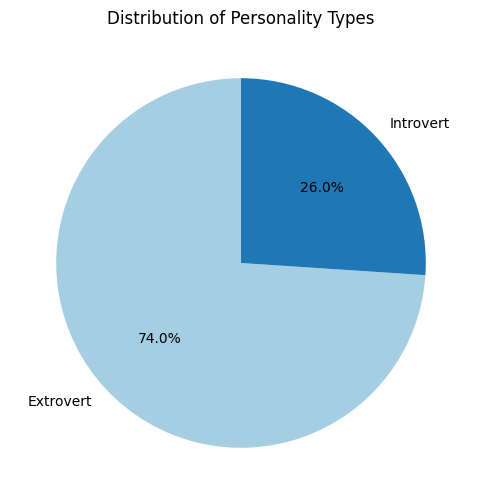

In [6]:
temp = df['Personality'].value_counts()
temp.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Personality Types')
plt.ylabel('')
plt.show()


In [7]:
df_intv = df[df['Personality'] == 'Introvert']

df = pd.concat([df, df_intv],axis=0, ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.shape

(23349, 8)

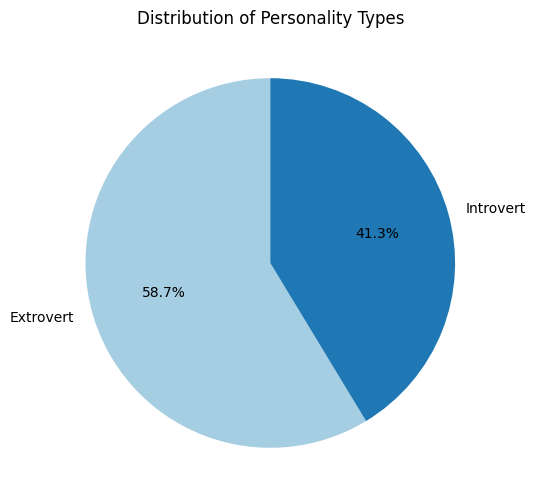

In [8]:
temp = df['Personality'].value_counts()
temp.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Personality Types')
plt.ylabel('')
plt.show()

In [9]:
cat_cols = df.columns[:-1]
cat_cols


Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

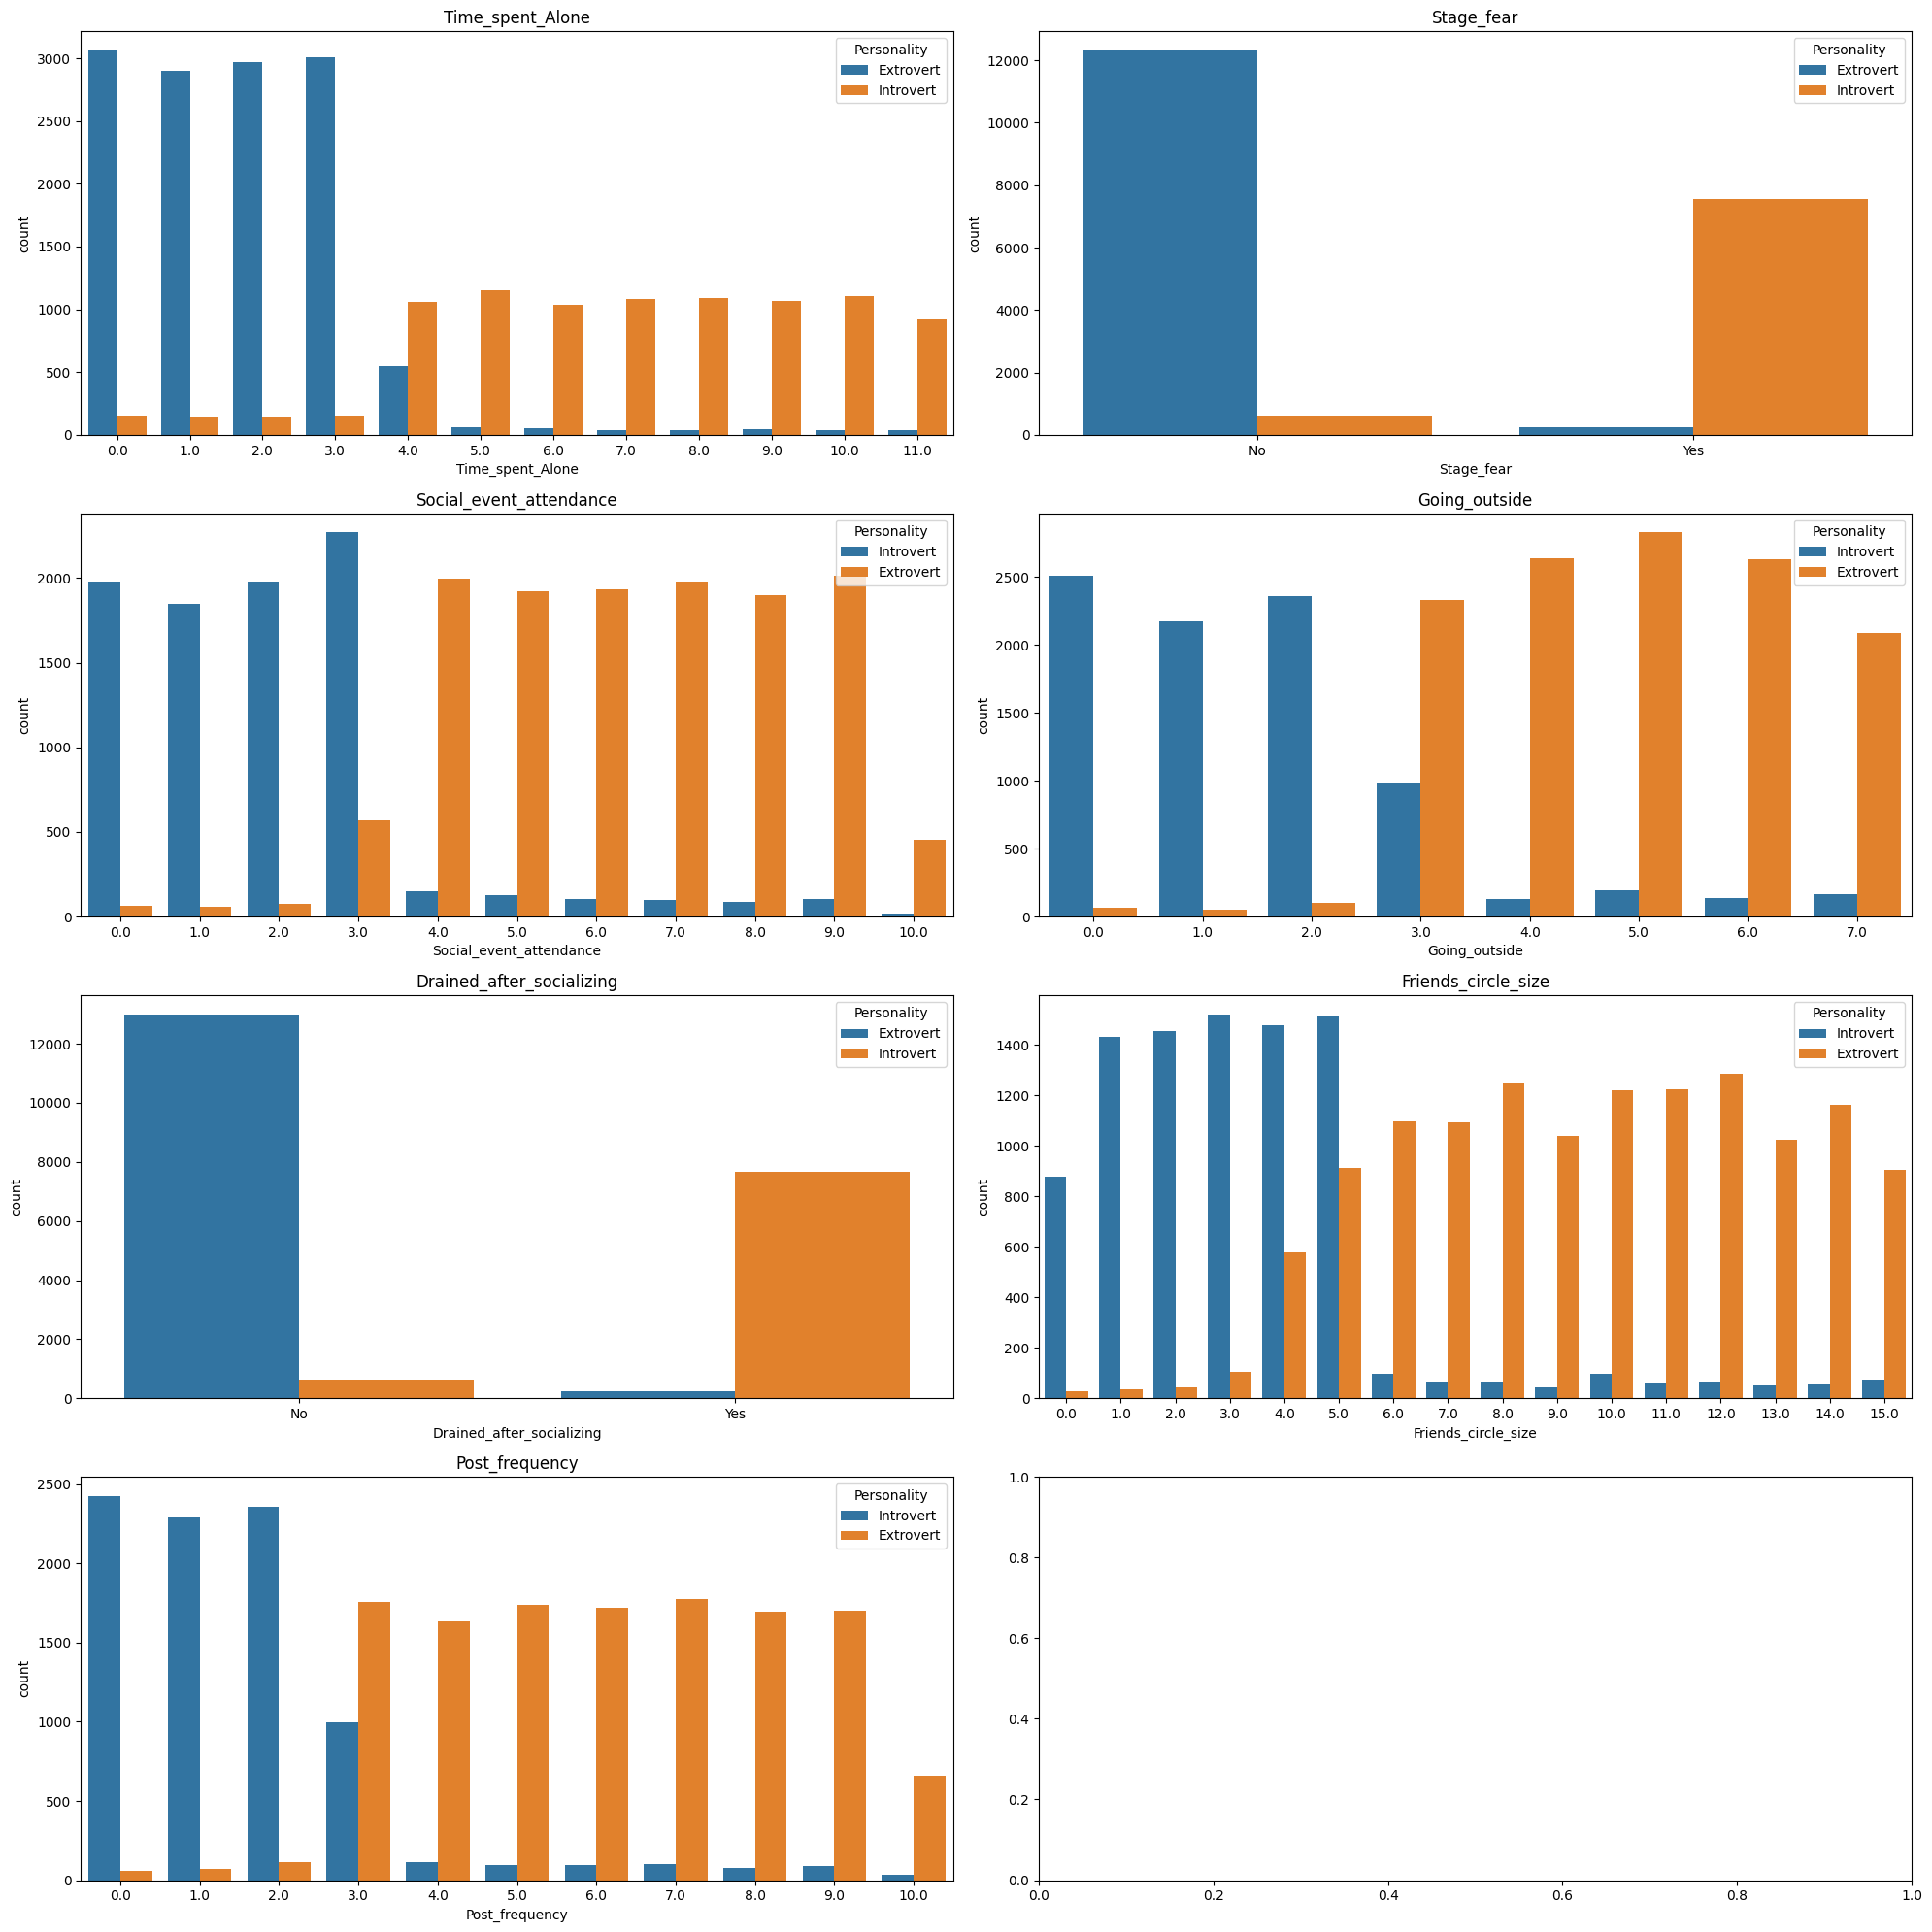

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

axes = axes.flatten()
for ax, col in zip(axes, cat_cols):
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].round()
    sns.countplot(data=df, x=col, ax=ax, hue='Personality')
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [11]:
df.isnull().sum()

Time_spent_Alone             1471
Stage_fear                   2637
Social_event_attendance      1628
Going_outside                1970
Drained_after_socializing    1836
Friends_circle_size          1408
Post_frequency               1751
Personality                     0
dtype: int64

In [12]:

def fill_with_neighbors_mode(series):
    values = series.values.copy()
    for i in range(len(values)):
        if pd.isna(values[i]):
            neighbors = []
            if i > 0 and not pd.isna(values[i-1]):
                neighbors.append(values[i-1])
            if i < len(values)-1 and not pd.isna(values[i+1]):
                neighbors.append(values[i+1])
            if neighbors:
                
                values[i] = max(set(neighbors), key=neighbors.count)
            else:
                
                values[i] = series.mode()[0]
    return pd.Series(values, index=series.index)

df['Stage_fear'] = df['Stage_fear'].map({'Yes': 0, 'No': 1})

df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 0, 'No': 1})



for col in df.columns: 
    df[col] = fill_with_neighbors_mode(df[col])

In [13]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,1.0,1.0,4.0,6.0,1.0,7.0,5.0,1
1,0.0,1.0,6.0,3.0,1.0,8.0,9.0,1
2,3.0,1.0,4.0,5.0,1.0,13.0,8.0,1
3,0.0,1.0,8.0,7.0,1.0,15.0,4.0,1
4,2.0,1.0,4.0,4.0,1.0,4.0,4.0,1


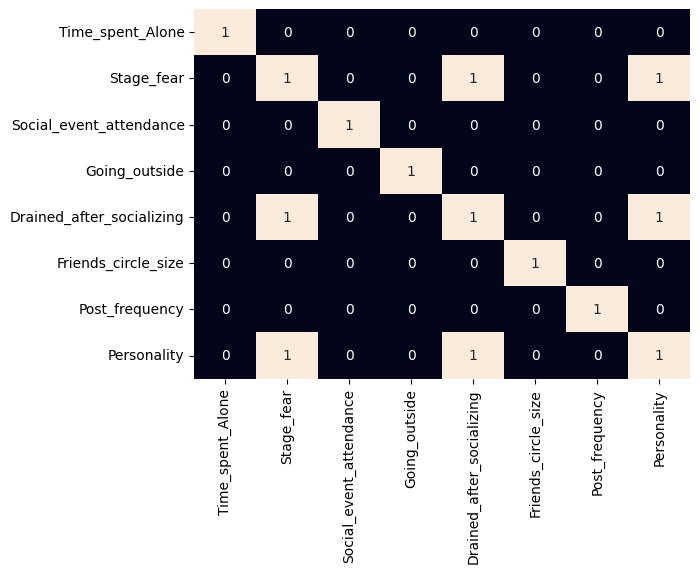

In [14]:
sns.heatmap(df.corr()>0.8, annot=True, cbar=False)
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

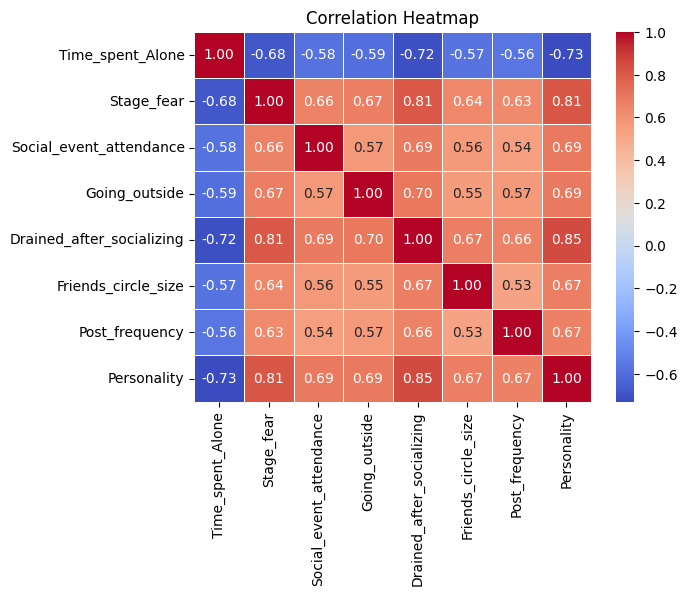

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')  

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [17]:
x = df.drop('Personality', axis=1)

y = df['Personality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
models = [LogisticRegression(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),]

for model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    print(model.__class__.__name__)
    print("Train Accuracy:", accuracy_score(y_train, y_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


LogisticRegression
Train Accuracy: 0.9616681835216018
Test Accuracy: 0.9593147751605996
RandomForestClassifier
Train Accuracy: 0.9929867765940361
Test Accuracy: 0.9691648822269807
GradientBoostingClassifier
Train Accuracy: 0.962524760426147
Test Accuracy: 0.9597430406852249


In [19]:
test = pd.read_csv('test.csv')
test.drop(['id'], axis=1, inplace=True, errors='ignore')
test.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,No,7.0,4.0,No,6.0,NaN
1,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,3.0,No,5.0,6.0,No,15.0,9.0
3,3.0,No,4.0,4.0,No,5.0,6.0
4,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [21]:
test['Stage_fear'] = test['Stage_fear'].map({'Yes': 0.0, 'No': 1.0})

test['Drained_after_socializing'] = test['Drained_after_socializing'].map({'Yes': 0.0, 'No': 1.0})

for col in test.columns: 
    test[col] = fill_with_neighbors_mode(test[col])

In [22]:
test.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,1.0,7.0,4.0,1.0,6.0,1.0
1,3.0,0.0,0.0,0.0,0.0,5.0,1.0
2,3.0,1.0,5.0,6.0,1.0,15.0,9.0
3,3.0,1.0,4.0,4.0,1.0,5.0,6.0
4,9.0,0.0,1.0,2.0,0.0,1.0,1.0


In [33]:
model = models[0] 
   
test_features = test.drop(columns=['Personality'], errors='ignore')
y_test_pred = model.predict(test_features)
test['Personality'] = y_test_pred
test['Personality'] = test['Personality'].map({0: 'Introvert', 1: 'Extrovert'})
test[['Personality']].to_csv(f'submission_{model.__class__.__name__}.csv', index=False)
    
print(f'Submission file for {model.__class__.__name__} created.')


Submission file for LogisticRegression created.


In [39]:
submission_csv = pd.read_csv('test.csv')[['id']]

submission_csv['Personality'] = pd.read_csv(f'submission_LogisticRegression.csv')['Personality']

submission_csv.to_csv('final_submission.csv', index=False)

# Final Submission

Thank you
